<a href="https://colab.research.google.com/github/G0nkly/Ready-Set-Prophecy/blob/main/Timeseries_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Reproduzierbarkeit
np.random.seed(42)

# Zeitachse: 2 Jahre tägliche Daten
dates = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
n = len(dates)

# Komponenten
base_level = 900
trend = np.linspace(0, 50, n)
weekly_seasonality = 40 * np.sin(2 * np.pi * dates.dayofweek / 7)
noise = np.random.normal(0, 15, n)

# Verbrauch
consumption = base_level + trend + weekly_seasonality + noise

# DataFrame
df = pd.DataFrame({
    "date": dates,
    "consumption_mwh": consumption
})

# Als CSV speichern
df.to_csv("consumption_daily.csv", index=False)

df.head()

,date,consumption_mwh
0,2022-01-01,868.453596
1,2022-01-02,866.721363
2,2022-01-03,909.852502
3,2022-01-04,954.324468
4,2022-01-05,935.759164


In [ ]:
df = pd.read_csv("consumption_daily.csv", parse_dates=["date"])
df = df.set_index("date")

df.head()

,consumption_mwh
date,
2022-01-01,868.453596
2022-01-02,866.721363
2022-01-03,909.852502
2022-01-04,954.324468
2022-01-05,935.759164


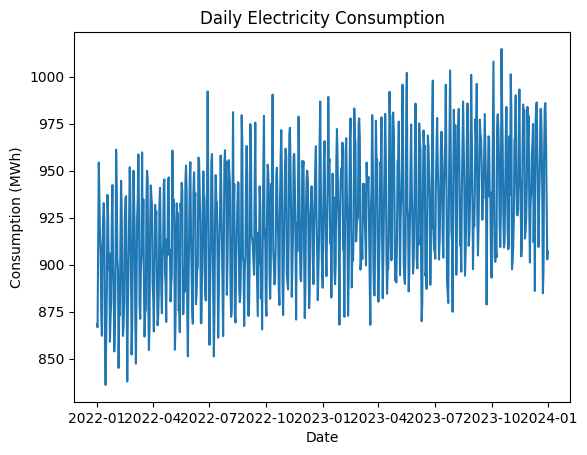

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df.index, df["consumption_mwh"])
plt.title("Daily Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (MWh)")
plt.show()


In [ ]:
### Model training

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]

print("Train:", train.shape)
print("Test:", test.shape)

Train: (700, 1)
Test: (30, 1)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima = SARIMAX(
    train["consumption_mwh"],
    order=(1, 1, 1)
)

arima_fit = arima.fit(disp=False)

arima_forecast = arima_fit.forecast(30)
arima_forecast

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,predicted_mean
2023-12-02,919.444259
2023-12-03,919.797550
2023-12-04,919.782637
2023-12-05,919.783266
2023-12-06,919.783240
2023-12-07,919.783241
2023-12-08,919.783241
2023-12-09,919.783241
2023-12-10,919.783241
2023-12-11,919.783241


In [ ]:
sarima = SARIMAX(
    train["consumption_mwh"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7)
)

sarima_fit = sarima.fit(disp=False)

sarima_forecast = sarima_fit.forecast(30)
sarima_forecast

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,predicted_mean
2023-12-02,909.481750
2023-12-03,917.886095
2023-12-04,945.329115
2023-12-05,979.565370
2023-12-06,986.043205
2023-12-07,967.145059
2023-12-08,930.447302
2023-12-09,910.062739
2023-12-10,918.480235
2023-12-11,945.783253


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets = ExponentialSmoothing(
    train["consumption_mwh"],
    trend="add",
    seasonal="add",
    seasonal_periods=7
)

ets_fit = ets.fit()

ets_forecast = ets_fit.forecast(30)
ets_forecast

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,0
2023-12-02,909.577317
2023-12-03,918.023671
2023-12-04,945.334154
2023-12-05,979.671707
2023-12-06,985.799817
2023-12-07,967.324502
2023-12-08,930.458510
2023-12-09,910.056091
2023-12-10,918.502445
2023-12-11,945.812928


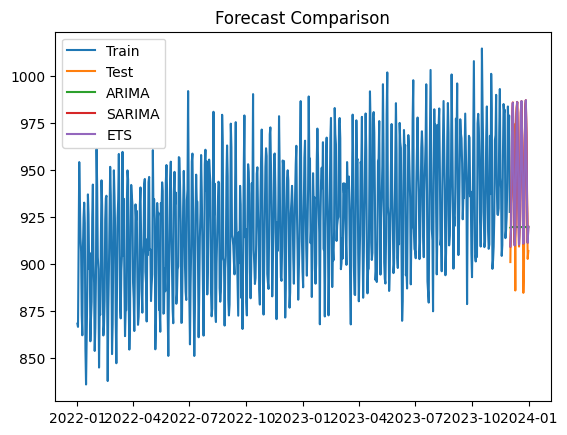

In [ ]:
plt.figure()

plt.plot(train.index, train["consumption_mwh"], label="Train")
plt.plot(test.index, test["consumption_mwh"], label="Test")

plt.plot(test.index, arima_forecast, label="ARIMA")
plt.plot(test.index, sarima_forecast, label="SARIMA")
plt.plot(test.index, ets_forecast, label="ETS")

plt.title("Forecast Comparison")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# ARIMA
arima_rmse, arima_mae, arima_mape = evaluate_forecast(test["consumption_mwh"], arima_forecast)

# SARIMA
sarima_rmse, sarima_mae, sarima_mape = evaluate_forecast(test["consumption_mwh"], sarima_forecast)

# ETS
ets_rmse, ets_mae, ets_mape = evaluate_forecast(test["consumption_mwh"], ets_forecast)

print("ARIMA: RMSE {:.2f}, MAE {:.2f}, MAPE {:.2f}%".format(arima_rmse, arima_mae, arima_mape))
print("SARIMA: RMSE {:.2f}, MAE {:.2f}, MAPE {:.2f}%".format(sarima_rmse, sarima_mae, sarima_mape))
print("ETS: RMSE {:.2f}, MAE {:.2f}, MAPE {:.2f}%".format(ets_rmse, ets_mae, ets_mape))

ARIMA: RMSE 40.15, MAE 35.07, MAPE 3.66%
SARIMA: RMSE 14.48, MAE 11.17, MAPE 1.20%
ETS: RMSE 14.46, MAE 11.15, MAPE 1.20%


In [ ]:
### Prophet

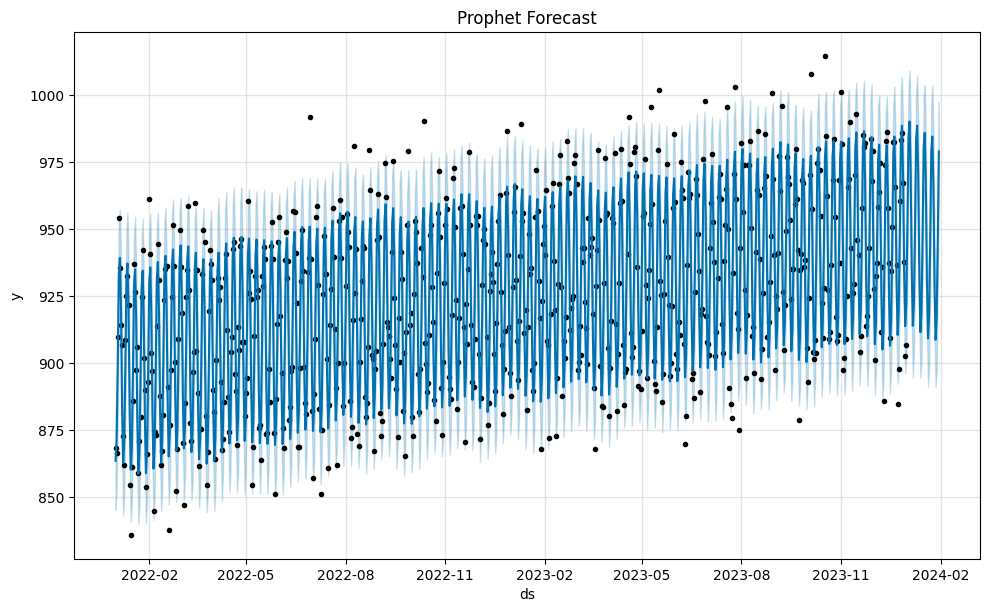

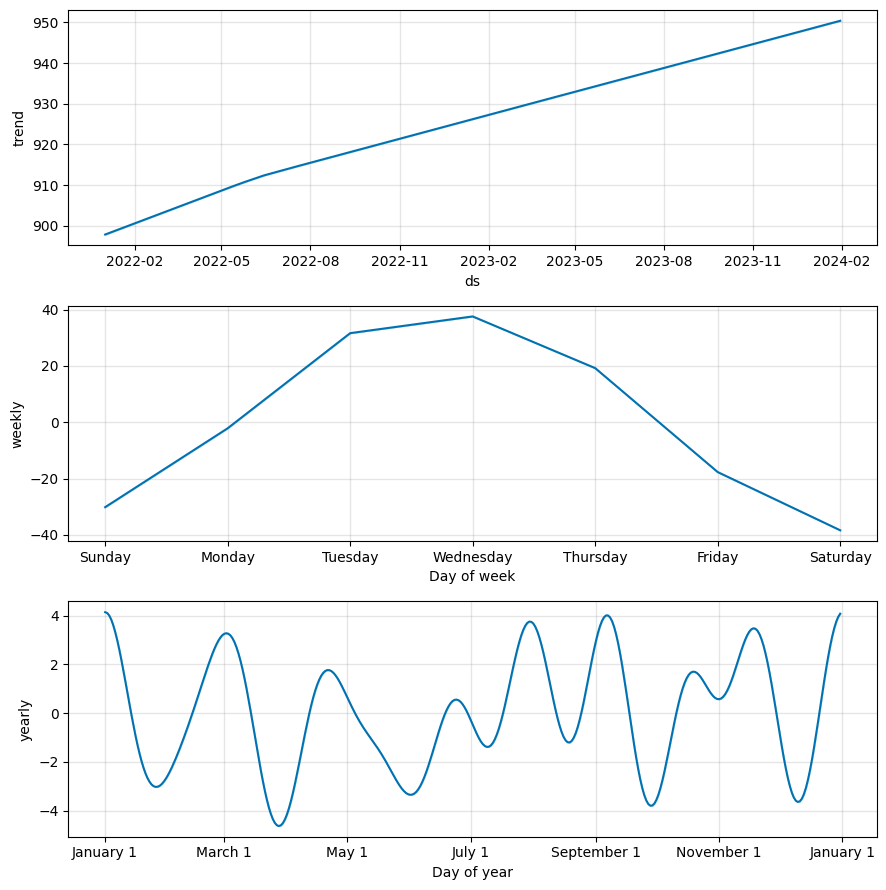

In [ ]:
!pip install prophet --quiet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# CSV einlesen
df = pd.read_csv("consumption_daily.csv", parse_dates=["date"])
df_prophet = df.rename(columns={"date": "ds", "consumption_mwh": "y"})

# Prophet Modell
model_prophet = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
model_prophet.fit(df_prophet)

# Forecast für nächsten Monat
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Visualisierung
fig1 = model_prophet.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# Komponenten (Trend + Saison)
fig2 = model_prophet.plot_components(forecast)
plt.show()


In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]

X_train = train.drop("consumption_mwh", axis=1)
y_train = train["consumption_mwh"]

X_test = test.drop("consumption_mwh", axis=1)
y_test = test["consumption_mwh"]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prophet Forecast auf Testperiode beschränken
prophet_test = forecast.set_index("ds").loc[y_test.index]["yhat"]

# Metriken
prophet_rmse = np.sqrt(mean_squared_error(y_test, prophet_test))
prophet_mae = mean_absolute_error(y_test, prophet_test)
prophet_mape = np.mean(np.abs((y_test - prophet_test) / y_test)) * 100

print("Prophet Evaluation")
print(f"RMSE: {prophet_rmse:.2f}")
print(f"MAE:  {prophet_mae:.2f}")
print(f"MAPE: {prophet_mape:.2f}%")


Prophet Evaluation
RMSE: 14.68
MAE:  11.62
MAPE: 1.25%


In [ ]:
### XGBoost / LightGBM

# **XGBoost**
XGBoost vs standard gradient boosting:

**Functionality**
*   L1 (Lasso Regression, simplifies the model by removing less important features) and L2(Ridge Regression, balances influence of different features)
*   Tree pruning (limit the depth of decision trees - avoid complex models)
*   Parallel Processing
*   XBoost can handle missing data automatically

**Point of use**
*   Tabular Data, Large Datasets (Parallelization!)
*   Feature Importance - built-in feature importance scores
*   Hyperparameters for handling imbalanced datasets

**Competitors**
*   LightGBM (histogram-based, supports GPU)
*   CatBoost (good for categorical features)


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("consumption_daily.csv", parse_dates=["date"])
df = df.set_index("date")

# Kalenderfeatures
df["day_of_week"] = df.index.dayofweek
df["weekend"] = (df["day_of_week"] >= 5).astype(int)
df["month"] = df.index.month

# Lag-Features
df["lag_1"] = df["consumption_mwh"].shift(1)
df["lag_7"] = df["consumption_mwh"].shift(7)
df["lag_14"] = df["consumption_mwh"].shift(14)

# Rolling Statistics
df["rolling_mean_7"] = df["consumption_mwh"].rolling(7).mean()
df["rolling_std_7"] = df["consumption_mwh"].rolling(7).std()

df = df.dropna()
df.head()

,consumption_mwh,day_of_week,weekend,month,lag_1,lag_7,lag_14,rolling_mean_7,rolling_std_7
date,,,,,,,,,
2022-01-15,836.089336,5,1,1,854.837079,872.994514,868.453596,891.642392,39.397251
2022-01-16,861.321234,6,1,1,836.089336,862.233322,866.721363,891.512094,39.512067
2022-01-17,885.904927,0,0,1,861.321234,908.755685,909.852502,888.247700,38.787295
2022-01-18,937.152950,1,0,1,885.904927,925.007865,954.324468,889.982712,40.918756
2022-01-19,926.611323,2,0,1,937.152950,932.765628,935.759164,889.103525,39.899737


In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]

X_train = train.drop("consumption_mwh", axis=1)
y_train = train["consumption_mwh"]

X_test = test.drop("consumption_mwh", axis=1)
y_test = test["consumption_mwh"]

In [ ]:
!pip install xgboost --quiet
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_forecast = xgb.predict(X_test)
xgb_forecast

array([918.07294, 924.58673, 950.91785, 973.13916, 974.7186 , 957.3038 ,
       918.0124 , 926.269  , 912.54047, 959.73413, 987.92346, 987.09906,
       970.8797 , 915.1683 , 914.912  , 921.549  , 944.1649 , 978.9704 ,
       975.97363, 957.71985, 928.7886 , 908.29285, 913.12537, 960.6401 ,
       988.4644 , 973.9879 , 964.8005 , 918.545  , 907.32355, 928.72723],
      dtype=float32)

In [ ]:
!pip install lightgbm --quiet
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

lgbm.fit(X_train, y_train)

lgbm_forecast = lgbm.predict(X_test)
lgbm_forecast

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 8
[LightGBM] [Info] Start training from score 924.285510
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

array([918.59162876, 924.18795828, 950.96582938, 973.1909852 ,
       975.70816531, 954.59473464, 924.91717922, 926.38889451,
       913.99635988, 952.95008016, 995.14733895, 982.55475379,
       969.33417991, 926.84582462, 916.24378866, 924.14644801,
       949.69464431, 977.69625468, 966.17228835, 952.40895491,
       934.55251018, 915.64893159, 910.78929008, 969.62818262,
       994.43567579, 979.7188918 , 965.86833389, 921.97599243,
       908.79823255, 921.9600615 ])

In [ ]:
# XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))
xgb_mae = mean_absolute_error(y_test, xgb_forecast)
xgb_mape = np.mean(np.abs((y_test - xgb_forecast) / y_test)) * 100

# LightGBM
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_forecast))
lgbm_mae = mean_absolute_error(y_test, lgbm_forecast)
lgbm_mape = np.mean(np.abs((y_test - lgbm_forecast) / y_test)) * 100

print("XGBoost Evaluation")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"MAE:  {xgb_mae:.2f}")
print(f"MAPE: {xgb_mape:.2f}%\n")

print("LightGBM Evaluation")
print(f"RMSE: {lgbm_rmse:.2f}")
print(f"MAE:  {lgbm_mae:.2f}")
print(f"MAPE: {lgbm_mape:.2f}%")


XGBoost Evaluation
RMSE: 13.08
MAE:  11.12
MAPE: 1.19%

LightGBM Evaluation
RMSE: 13.79
MAE:  11.95
MAPE: 1.28%


In [ ]:
results = pd.DataFrame({
    "Model": ["Prophet", "XGBoost", "LightGBM"],
    "RMSE": [prophet_rmse, xgb_rmse, lgbm_rmse],
    "MAE": [prophet_mae, xgb_mae, lgbm_mae],
    "MAPE (%)": [prophet_mape, xgb_mape, lgbm_mape]
})

results

,Model,RMSE,MAE,MAPE (%)
0,Prophet,14.680781,11.619493,1.245279
1,XGBoost,13.077365,11.120015,1.191628
2,LightGBM,13.787749,11.946707,1.275873


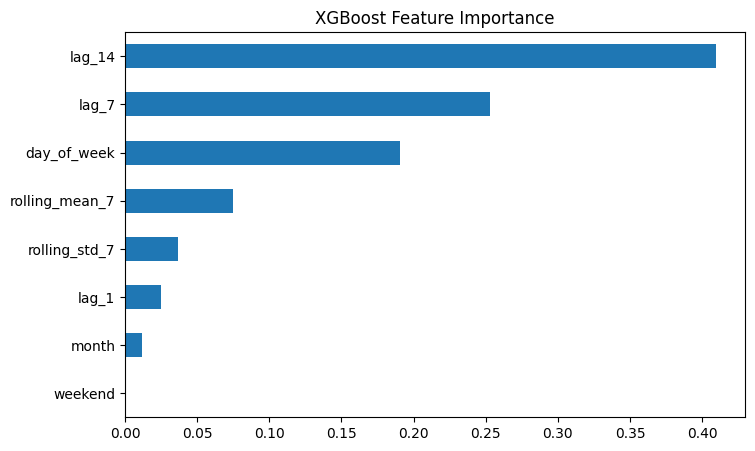

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
features = X_train.columns

fi = pd.Series(importance, index=features).sort_values(ascending=False)

fi.plot(kind="barh", figsize=(8,5))
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


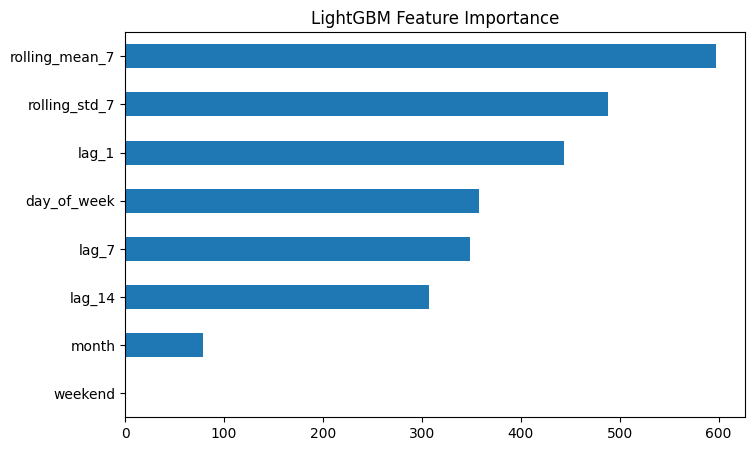

In [ ]:
lgbm_importance = lgbm.feature_importances_
fi_lgbm = pd.Series(lgbm_importance, index=features).sort_values(ascending=False)

fi_lgbm.plot(kind="barh", figsize=(8,5))
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()